In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [8]:
# changed split to 70-20-10

df = pd.read_csv("https://raw.githubusercontent.com/bournenadia26/cs131/refs/heads/main/lr.csv")
df_deduped = pd.read_csv("https://raw.githubusercontent.com/bournenadia26/cs131/refs/heads/main/lr_deduped.csv")

df = df.rename(columns={df.columns[0]: "label"}) #rename label col (has no name)
df_deduped = df_deduped.rename(columns={df_deduped.columns[0]: "label"})

df = df.sample(frac=1, random_state=1).reset_index(drop=True) #to shuffle
df_deduped = df_deduped.sample(frac=1, random_state=1).reset_index(drop=True)

train_val_df, test_df = train_test_split(df, test_size=0.1, random_state=1, stratify=df["label"]) # split
train_df, val_df = train_test_split(train_val_df, test_size=2/9, random_state=1, stratify=train_val_df["label"])
train_val_df_dd, test_df_dd = train_test_split(df_deduped, test_size=0.1, random_state=1, stratify=df_deduped["label"])
train_df_dd, val_df_dd = train_test_split(train_val_df_dd, test_size=2/9, random_state=1, stratify=train_val_df_dd["label"])

X_train = train_df.iloc[:, 1:].to_numpy() #to numpy arr
y_train = train_df.iloc[:, 0].to_numpy()
X_val = val_df.iloc[:, 1:].to_numpy()
y_val = val_df.iloc[:, 0].to_numpy()
X_test = test_df.iloc[:, 1:].to_numpy()
y_test = test_df.iloc[:, 0].to_numpy()

X_train_dd = train_df_dd.iloc[:, 1:].to_numpy()
y_train_dd = train_df_dd.iloc[:, 0].to_numpy()
X_val_dd = val_df_dd.iloc[:, 1:].to_numpy()
y_val_dd = val_df_dd.iloc[:, 0].to_numpy()
X_test_dd = test_df_dd.iloc[:, 1:].to_numpy()
y_test_dd = test_df_dd.iloc[:, 0].to_numpy()

In [9]:
# Random Forest (without 5-fold cross validation)

def build_rf(): #params have been changed to match best params found with gridsearchcv for comparison's sake
  model = RandomForestClassifier(
    n_estimators=750,
    max_depth=15,
    random_state=1
  )
  return model

# normal
rf = build_rf()
rf.fit(X_train, y_train)

# train
y_train_pred = rf.predict(X_train)
rf_train_acc = accuracy_score(y_train, y_train_pred)
rf_train_precision = precision_score(y_train, y_train_pred, average='macro', zero_division=0)
rf_train_recall = recall_score(y_train, y_train_pred, average='macro', zero_division=0)
rf_train_f1 = f1_score(y_train, y_train_pred, average='macro', zero_division=0)

# test
y_test_pred = rf.predict(X_test)
rf_test_acc = accuracy_score(y_test, y_test_pred)
rf_test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
rf_test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=0)
rf_test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

print("\nRandom Forest (original training set):")
print(f"Train Accuracy: {rf_train_acc:.4f}")
print(f"Train Precision: {rf_train_precision:.4f}")
print(f"Train Recall: {rf_train_recall:.4f}")
print(f"Train F1-score: {rf_train_f1:.4f}")
print(f"Test Accuracy: {rf_test_acc:.4f}")
print(f"Test Precision: {rf_test_precision:.4f}")
print(f"Test Recall: {rf_test_recall:.4f}")
print(f"Test F1-score: {rf_test_f1:.4f}")

# deduped
rf_dd = build_rf()
rf_dd.fit(X_train_dd, y_train_dd)

# train dd
y_train_pred_dd = rf_dd.predict(X_train_dd)
rf_train_acc_dd = accuracy_score(y_train_dd, y_train_pred_dd)
rf_train_precision_dd = precision_score(y_train_dd, y_train_pred_dd, average='macro', zero_division=0)
rf_train_recall_dd = recall_score(y_train_dd, y_train_pred_dd, average='macro', zero_division=0)
rf_train_f1_dd = f1_score(y_train_dd, y_train_pred_dd, average='macro', zero_division=0)

# test dd
y_test_pred_dd = rf_dd.predict(X_test_dd)
rf_test_acc_dd = accuracy_score(y_test_dd, y_test_pred_dd)
rf_test_precision_dd = precision_score(y_test_dd, y_test_pred_dd, average='macro', zero_division=0)
rf_test_recall_dd = recall_score(y_test_dd, y_test_pred_dd, average='macro', zero_division=0)
rf_test_f1_dd = f1_score(y_test_dd, y_test_pred_dd, average='macro', zero_division=0)

print("\nRandom Forest (deduplicated training set):")
print(f"Train Accuracy: {rf_train_acc_dd:.4f}")
print(f"Train Precision: {rf_train_precision_dd:.4f}")
print(f"Train Recall: {rf_train_recall_dd:.4f}")
print(f"Train F1-score: {rf_train_f1_dd:.4f}")
print(f"Test Accuracy: {rf_test_acc_dd:.4f}")
print(f"Test Precision: {rf_test_precision_dd:.4f}")
print(f"Test Recall: {rf_test_recall_dd:.4f}")
print(f"Test F1-score: {rf_test_f1_dd:.4f}")



Random Forest (original training set):
Train Accuracy: 0.9942
Train Precision: 0.9943
Train Recall: 0.9942
Train F1-score: 0.9942
Test Accuracy: 0.9500
Test Precision: 0.9517
Test Recall: 0.9495
Test F1-score: 0.9498

Random Forest (deduplicated training set):
Train Accuracy: 0.9941
Train Precision: 0.9942
Train Recall: 0.9941
Train F1-score: 0.9941
Test Accuracy: 0.9454
Test Precision: 0.9464
Test Recall: 0.9446
Test F1-score: 0.9449


In [10]:
# Random Forest (with 5-fold cross validation)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

rf_cval_acc = []
rf_cval_f1 = []
rf_cval_precision = []
rf_cval_recall = []

fold = 1
for train_index, val_index in kfold.split(X_train):

    X_tr, X_val_fold = X_train[train_index], X_train[val_index]
    y_tr, y_val_fold = y_train[train_index], y_train[val_index]

    rf_cv = build_rf()

    rf_cv.fit(X_tr, y_tr)

    y_val_pred = rf_cv.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred, average='macro')
    precision = precision_score(y_val_fold, y_val_pred, average='macro')
    recall = recall_score(y_val_fold, y_val_pred, average='macro')

    print(f"Fold {fold} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    rf_cval_acc.append(acc)
    rf_cval_f1.append(f1)
    rf_cval_precision.append(precision)
    rf_cval_recall.append(recall)
    fold += 1

rf_cv_avg_acc = np.mean(rf_cval_acc)
rf_cv_avg_f1 = np.mean(rf_cval_f1)
rf_cv_avg_precision = np.mean(rf_cval_precision)
rf_cv_avg_recall = np.mean(rf_cval_recall)

print(f"Avg Accuracy: {rf_cv_avg_acc:.4f}")
print(f"Avg F1 Score: {rf_cv_avg_f1:.4f}")
print(f"Avg Precision: {rf_cv_avg_precision:.4f}")
print(f"Avg Recall: {rf_cv_avg_recall:.4f}")

rf_cval_acc_dd = []
rf_cval_f1_dd = []
rf_cval_precision_dd = []
rf_cval_recall_dd = []

fold = 1
for train_index, val_index in kfold.split(X_train_dd):

    X_tr_dd, X_val_fold_dd = X_train_dd[train_index], X_train_dd[val_index]
    y_tr_dd, y_val_fold_dd = y_train_dd[train_index], y_train_dd[val_index]

    rf_cv_dd = build_rf()

    rf_cv_dd.fit(X_tr_dd, y_tr_dd)

    y_val_pred_dd = rf_cv_dd.predict(X_val_fold_dd)

    acc_dd = accuracy_score(y_val_fold_dd, y_val_pred_dd)
    f1_dd = f1_score(y_val_fold_dd, y_val_pred_dd, average='macro')
    precision_dd = precision_score(y_val_fold_dd, y_val_pred_dd, average='macro')
    recall_dd = recall_score(y_val_fold_dd, y_val_pred_dd, average='macro')

    print(f"Fold {fold} - Accuracy: {acc_dd:.4f}, F1 Score: {f1_dd:.4f}, Precision: {precision_dd:.4f}, Recall: {recall_dd:.4f}")

    rf_cval_acc_dd.append(acc_dd)
    rf_cval_f1_dd.append(f1_dd)
    rf_cval_precision_dd.append(precision_dd)
    rf_cval_recall_dd.append(recall_dd)
    fold += 1

rf_cv_avg_acc_dd = np.mean(rf_cval_acc_dd)
rf_cv_avg_f1_dd = np.mean(rf_cval_f1_dd)
rf_cv_avg_precision_dd = np.mean(rf_cval_precision_dd)
rf_cv_avg_recall_dd = np.mean(rf_cval_recall_dd)

print(f"Avg Accuracy (deduped): {rf_cv_avg_acc_dd:.4f}")
print(f"Avg F1 Score (deduped): {rf_cv_avg_f1_dd:.4f}")
print(f"Avg Precision (deduped): {rf_cv_avg_precision_dd:.4f}")
print(f"Avg Recall (deduped): {rf_cv_avg_recall_dd:.4f}")


Fold 1 - Accuracy: 0.9486, F1 Score: 0.9483, Precision: 0.9490, Recall: 0.9487
Fold 2 - Accuracy: 0.9425, F1 Score: 0.9421, Precision: 0.9433, Recall: 0.9425
Fold 3 - Accuracy: 0.9471, F1 Score: 0.9473, Precision: 0.9488, Recall: 0.9472
Fold 4 - Accuracy: 0.9443, F1 Score: 0.9430, Precision: 0.9440, Recall: 0.9436
Fold 5 - Accuracy: 0.9339, F1 Score: 0.9352, Precision: 0.9383, Recall: 0.9336
Avg Accuracy: 0.9433
Avg F1 Score: 0.9432
Avg Precision: 0.9447
Avg Recall: 0.9431
Fold 1 - Accuracy: 0.9426, F1 Score: 0.9424, Precision: 0.9439, Recall: 0.9427
Fold 2 - Accuracy: 0.9395, F1 Score: 0.9399, Precision: 0.9422, Recall: 0.9397
Fold 3 - Accuracy: 0.9384, F1 Score: 0.9375, Precision: 0.9397, Recall: 0.9368
Fold 4 - Accuracy: 0.9380, F1 Score: 0.9386, Precision: 0.9410, Recall: 0.9378
Fold 5 - Accuracy: 0.9468, F1 Score: 0.9462, Precision: 0.9479, Recall: 0.9459
Avg Accuracy (deduped): 0.9411
Avg F1 Score (deduped): 0.9409
Avg Precision (deduped): 0.9429
Avg Recall (deduped): 0.9406


In [11]:
# NEW! Random Forest w/ GridSearchCV + autotuning

def build_rf_GSCV():
    model = GridSearchCV(
        estimator=RandomForestClassifier(random_state=1),
        param_grid={
            'n_estimators': [100, 500, 750],
            'max_depth': [5, 10, 15]
        },
        cv=5,
        scoring={
            'accuracy': 'accuracy',
            'precision': make_scorer(precision_score, average='macro', zero_division=0),
            'recall': make_scorer(recall_score, average='macro', zero_division=0),
            'f1': make_scorer(f1_score, average='macro', zero_division=0)
        },
        refit='accuracy',
        verbose=0,
        return_train_score=True
    )
    return model

# normal cv
rf = build_rf_GSCV()
rf.fit(X_train, y_train)

print("Best parameters:", rf.best_params_)
print(f"Best accuracy from CV: {rf.best_score_}")

results = rf.cv_results_
best_index = rf.best_index_

# train
avg_accuracy_rf_gscv = results['mean_test_accuracy'][best_index]
avg_precision_rf_gscv = results['mean_test_precision'][best_index]
avg_recall_rf_gscv = results['mean_test_recall'][best_index]
avg_f1_rf_gscv = results['mean_test_f1'][best_index]

print(f"\nAverage CV Scores for Best Model:")
print(f"Accuracy: {avg_accuracy_rf_gscv:.4f}")
print(f"Precision: {avg_precision_rf_gscv:.4f}")
print(f"Recall: {avg_recall_rf_gscv:.4f}")
print(f"F1-score: {avg_f1_rf_gscv:.4f}")

# test
y_pred_test = rf.predict(X_test)
test_accuracy_rf_GSCV = accuracy_score(y_test, y_pred_test)
test_precision_rf_GSCV = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
test_recall_rf_GSCV = recall_score(y_test, y_pred_test, average='macro', zero_division=0)
test_f1_rf_GSCV = f1_score(y_test, y_pred_test, average='macro', zero_division=0)

print(f"\nTest Set Scores for Best Model:")
print(f"Accuracy: {test_accuracy_rf_GSCV:.4f}")
print(f"Precision: {test_precision_rf_GSCV:.4f}")
print(f"Recall: {test_recall_rf_GSCV:.4f}")
print(f"F1-score: {test_f1_rf_GSCV:.4f}")


# deduped cv
rf_dd = build_rf_GSCV()
rf_dd.fit(X_train_dd, y_train_dd)

print("Best parameters:", rf_dd.best_params_)
print(f"Best accuracy from CV: {rf_dd.best_score_}")

results_dd = rf_dd.cv_results_
best_index_dd = rf_dd.best_index_

# dd train
avg_accuracy_rf_gscv_dd = results_dd['mean_test_accuracy'][best_index_dd]
avg_precision_rf_gscv_dd = results_dd['mean_test_precision'][best_index_dd]
avg_recall_rf_gscv_dd = results_dd['mean_test_recall'][best_index_dd]
avg_f1_rf_gscv_dd = results_dd['mean_test_f1'][best_index_dd]

print(f"\nAverage CV Scores for Best Model (Deduplicated):")
print(f"Accuracy: {avg_accuracy_rf_gscv_dd:.4f}")
print(f"Precision: {avg_precision_rf_gscv_dd:.4f}")
print(f"Recall: {avg_recall_rf_gscv_dd:.4f}")
print(f"F1-score: {avg_f1_rf_gscv_dd:.4f}")

# dd test
y_pred_test_dd = rf_dd.predict(X_test)
test_accuracy_rf_dd_GSCV = accuracy_score(y_test, y_pred_test_dd)
test_precision_rf_dd_GSCV = precision_score(y_test, y_pred_test_dd, average='macro', zero_division=0)
test_recall_rf_dd_GSCV = recall_score(y_test, y_pred_test_dd, average='macro', zero_division=0)
test_f1_rf_dd_GSCV = f1_score(y_test, y_pred_test_dd, average='macro', zero_division=0)

print(f"\nTest Set Scores for Best Model (Deduplicated):")
print(f"Accuracy: {test_accuracy_rf_dd_GSCV:.4f}")
print(f"Precision: {test_precision_rf_dd_GSCV:.4f}")
print(f"Recall: {test_recall_rf_dd_GSCV:.4f}")
print(f"F1-score: {test_f1_rf_dd_GSCV:.4f}")


Best parameters: {'max_depth': 15, 'n_estimators': 750}
Best accuracy from CV: 0.9457822946970857

Average CV Scores for Best Model:
Accuracy: 0.9458
Precision: 0.9476
Recall: 0.9454
F1-score: 0.9458

Test Set Scores for Best Model:
Accuracy: 0.9500
Precision: 0.9517
Recall: 0.9495
F1-score: 0.9498
Best parameters: {'max_depth': 15, 'n_estimators': 750}
Best accuracy from CV: 0.9384659891642956

Average CV Scores for Best Model (Deduplicated):
Accuracy: 0.9385
Precision: 0.9414
Recall: 0.9378
F1-score: 0.9387

Test Set Scores for Best Model (Deduplicated):
Accuracy: 0.9790
Precision: 0.9795
Recall: 0.9788
F1-score: 0.9788


In [12]:
# Multinomial Logistic Regression

def build_mlr():
  model = LogisticRegression(
    solver="lbfgs",
    max_iter=3000,
    random_state=1
    )
  return model

mlr = build_mlr() # original

mlr.fit(X_train, y_train)

y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

mlr_train_acc = accuracy_score(y_train, y_train_pred)
mlr_test_acc = accuracy_score(y_test, y_test_pred)
mlr_precision = precision_score(y_test, y_test_pred, average='macro')
mlr_recall = recall_score(y_test, y_test_pred, average='macro')
mlr_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"MLR Train Accuracy: {mlr_train_acc:.4f}")
print(f"MLR Test Accuracy: {mlr_test_acc:.4f}")
print(f"MLR Precision: {mlr_precision:.4f}")
print(f"MLR Recall: {mlr_recall:.4f}")
print(f"MLR F1 Score: {mlr_f1:.4f}")


mlr_dd = build_mlr() # deduped

mlr_dd.fit(X_train_dd, y_train_dd)

y_train_pred_dd = mlr.predict(X_train_dd)
y_test_pred_dd = mlr_dd.predict(X_test_dd)

mlr_train_acc_dd = accuracy_score(y_train_dd, y_train_pred_dd)
mlr_test_acc_dd = accuracy_score(y_test_dd, y_test_pred_dd)
mlr_precision_dd = precision_score(y_test_dd, y_test_pred_dd, average='macro')
mlr_recall_dd = recall_score(y_test_dd, y_test_pred_dd, average='macro')
mlr_f1_dd = f1_score(y_test_dd, y_test_pred_dd, average='macro')

print(f"MLR (deduped) Train Accuracy: {mlr_train_acc_dd:.4f}")
print(f"MLR (deduped) Test Accuracy: {mlr_test_acc_dd:.4f}")
print(f"MLR (deduped) Precision: {mlr_precision_dd:.4f}")
print(f"MLR (deduped) Recall: {mlr_recall_dd:.4f}")
print(f"MLR (deduped) F1 Score: {mlr_f1_dd:.4f}")

MLR Train Accuracy: 0.7806
MLR Test Accuracy: 0.7670
MLR Precision: 0.7641
MLR Recall: 0.7656
MLR F1 Score: 0.7639
MLR (deduped) Train Accuracy: 0.7666
MLR (deduped) Test Accuracy: 0.7434
MLR (deduped) Precision: 0.7436
MLR (deduped) Recall: 0.7436
MLR (deduped) F1 Score: 0.7428


In [13]:
#NEW! Multinomial Logistic Regression w/ GridSearchCV + autotuning

def build_mlr_GSCV():
    model = GridSearchCV(
        estimator=LogisticRegression(
            solver='lbfgs',
            max_iter=3000,
            random_state=1
        ),
        param_grid={
            'C': [0.01, 0.1, 1, 10]
        },
        cv=5,
        scoring={
            'accuracy': 'accuracy',
            'precision': make_scorer(precision_score, average='macro', zero_division=0),
            'recall': make_scorer(recall_score, average='macro', zero_division=0),
            'f1': make_scorer(f1_score, average='macro', zero_division=0)
        },
        refit='accuracy',
        verbose=0,
        return_train_score=True
    )
    return model

# normal train
mlr_GSCV = build_mlr_GSCV()
mlr_GSCV.fit(X_train, y_train)

print("Best parameters:", mlr_GSCV.best_params_)
print(f"Best accuracy from CV: {mlr_GSCV.best_score_}")

results_mlr_GSCV = mlr_GSCV.cv_results_
best_index_mlr_GSCV = mlr_GSCV.best_index_

avg_accuracy_mlr_GSCV = results_mlr_GSCV['mean_test_accuracy'][best_index_mlr_GSCV]
avg_precision_mlr_GSCV = results_mlr_GSCV['mean_test_precision'][best_index_mlr_GSCV]
avg_recall_mlr_GSCV = results_mlr_GSCV['mean_test_recall'][best_index_mlr_GSCV]
avg_f1_mlr_GSCV = results_mlr_GSCV['mean_test_f1'][best_index_mlr_GSCV]

print("\nAverage CV Scores for Best Model:")
print(f"Accuracy: {avg_accuracy_mlr_GSCV:.4f}")
print(f"Precision: {avg_precision_mlr_GSCV:.4f}")
print(f"Recall: {avg_recall_mlr_GSCV:.4f}")
print(f"F1-score: {avg_f1_mlr_GSCV:.4f}")

# test
mlr_best = mlr_GSCV.best_estimator_
y_train_pred = mlr_best.predict(X_train)
y_test_pred = mlr_best.predict(X_test)

mlr_train_acc_GSCV = accuracy_score(y_train, y_train_pred)
mlr_train_precision_GSCV = precision_score(y_train, y_train_pred, average='macro', zero_division=0)
mlr_train_recall_GSCV = recall_score(y_train, y_train_pred, average='macro', zero_division=0)
mlr_train_f1_GSCV = f1_score(y_train, y_train_pred, average='macro', zero_division=0)

mlr_test_acc_GSCV = accuracy_score(y_test, y_test_pred)
mlr_test_precision_GSCV = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
mlr_test_recall_GSCV = recall_score(y_test, y_test_pred, average='macro', zero_division=0)
mlr_test_f1_GSCV = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

print("\nMultinomial Logistic Regression (original training set):")
print(f"Train Accuracy: {mlr_train_acc_GSCV:.4f}")
print(f"Train Precision: {mlr_train_precision_GSCV:.4f}")
print(f"Train Recall: {mlr_train_recall_GSCV:.4f}")
print(f"Train F1-score: {mlr_train_f1_GSCV:.4f}")
print(f"Test Accuracy: {mlr_test_acc_GSCV:.4f}")
print(f"Test Precision: {mlr_test_precision_GSCV:.4f}")
print(f"Test Recall: {mlr_test_recall_GSCV:.4f}")
print(f"Test F1-score: {mlr_test_f1_GSCV:.4f}")


# train dd
mlr_GSCV_dd = build_mlr_GSCV()
mlr_GSCV_dd.fit(X_train_dd, y_train_dd)

print("Best parameters:", mlr_GSCV_dd.best_params_)
print(f"Best accuracy from CV: {mlr_GSCV_dd.best_score_}")

results_mlr_GSCV_dd = mlr_GSCV_dd.cv_results_
best_index_mlr_GSCV_dd = mlr_GSCV_dd.best_index_

avg_accuracy_mlr_GSCV_dd = results_mlr_GSCV_dd['mean_test_accuracy'][best_index_mlr_GSCV_dd]
avg_precision_mlr_GSCV_dd = results_mlr_GSCV_dd['mean_test_precision'][best_index_mlr_GSCV_dd]
avg_recall_mlr_GSCV_dd = results_mlr_GSCV_dd['mean_test_recall'][best_index_mlr_GSCV_dd]
avg_f1_mlr_GSCV_dd = results_mlr_GSCV_dd['mean_test_f1'][best_index_mlr_GSCV_dd]

print("\nAverage CV Scores for Best Model (deduplicated):")
print(f"Accuracy: {avg_accuracy_mlr_GSCV_dd:.4f}")
print(f"Precision: {avg_precision_mlr_GSCV_dd:.4f}")
print(f"Recall: {avg_recall_mlr_GSCV_dd:.4f}")
print(f"F1-score: {avg_f1_mlr_GSCV_dd:.4f}")

# test dd
mlr_best_dd = mlr_GSCV_dd.best_estimator_
y_train_pred_dd = mlr_best_dd.predict(X_train_dd)
y_test_pred_dd = mlr_best_dd.predict(X_test_dd)

mlr_train_acc_dd_GSCV = accuracy_score(y_train_dd, y_train_pred_dd)
mlr_train_precision_dd_GSCV = precision_score(y_train_dd, y_train_pred_dd, average='macro', zero_division=0)
mlr_train_recall_dd_GSCV = recall_score(y_train_dd, y_train_pred_dd, average='macro', zero_division=0)
mlr_train_f1_dd_GSCV = f1_score(y_train_dd, y_train_pred_dd, average='macro', zero_division=0)

mlr_test_acc_dd_GSCV = accuracy_score(y_test_dd, y_test_pred_dd)
mlr_test_precision_dd_GSCV = precision_score(y_test_dd, y_test_pred_dd, average='macro', zero_division=0)
mlr_test_recall_dd_GSCV = recall_score(y_test_dd, y_test_pred_dd, average='macro', zero_division=0)
mlr_test_f1_dd_GSCV = f1_score(y_test_dd, y_test_pred_dd, average='macro', zero_division=0)

print("\nMultinomial Logistic Regression (deduplicated training set):")
print(f"Train Accuracy: {mlr_train_acc_dd_GSCV:.4f}")
print(f"Train Precision: {mlr_train_precision_dd_GSCV:.4f}")
print(f"Train Recall: {mlr_train_recall_dd_GSCV:.4f}")
print(f"Train F1-score: {mlr_train_f1_dd_GSCV:.4f}")
print(f"Test Accuracy: {mlr_test_acc_dd_GSCV:.4f}")
print(f"Test Precision: {mlr_test_precision_dd_GSCV:.4f}")
print(f"Test Recall: {mlr_test_recall_dd_GSCV:.4f}")
print(f"Test F1-score: {mlr_test_f1_dd_GSCV:.4f}")

Best parameters: {'C': 10}
Best accuracy from CV: 0.7733402235492267

Average CV Scores for Best Model:
Accuracy: 0.7733
Precision: 0.7731
Recall: 0.7720
F1-score: 0.7713

Multinomial Logistic Regression (original training set):
Train Accuracy: 0.7813
Train Precision: 0.7794
Train Recall: 0.7799
Train F1-score: 0.7790
Test Accuracy: 0.7675
Test Precision: 0.7648
Test Recall: 0.7661
Test F1-score: 0.7646
Best parameters: {'C': 10}
Best accuracy from CV: 0.7576152841817632

Average CV Scores for Best Model (deduplicated):
Accuracy: 0.7576
Precision: 0.7585
Recall: 0.7567
F1-score: 0.7561

Multinomial Logistic Regression (deduplicated training set):
Train Accuracy: 0.7687
Train Precision: 0.7681
Train Recall: 0.7679
Train F1-score: 0.7674
Test Accuracy: 0.7408
Test Precision: 0.7407
Test Recall: 0.7410
Test F1-score: 0.7400


In [14]:
# Multilayer Perceptron (without 5-fold cross validation)

# epochs lowered to 45 (was oscillating+had diminishing returns)

def build_mlp(array):
    model = Sequential([
        Input(shape=(array.shape[1],)),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(26, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

mlp = build_mlp(X_train)
mlp_dd = build_mlp(X_train_dd)

mlp_history = mlp.fit( # original
    X_train, y_train,
    epochs=45,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=0
)
mlp_history_dd = mlp_dd.fit(  # deduped
    X_train_dd, y_train_dd,
    epochs=45,
    batch_size=32,
    validation_data=(X_val_dd, y_val_dd),
    verbose=0
)

mlp_train_acc = mlp_history.history['accuracy'][-1]
mlp_test_loss, mlp_test_acc = mlp.evaluate(X_test, y_test) # original test
y_pred_probs = mlp.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
mlp_precision = precision_score(y_test, y_pred, average='macro')
mlp_recall = recall_score(y_test, y_pred, average='macro')
mlp_f1 = f1_score(y_test, y_pred, average='macro')

mlp_train_acc_dd = mlp_history_dd.history['accuracy'][-1]
mlp_test_loss_dd, mlp_test_acc_dd = mlp_dd.evaluate(X_test_dd, y_test_dd) # deduped test
y_pred_probs_dd = mlp_dd.predict(X_test_dd)
y_pred_dd = np.argmax(y_pred_probs_dd, axis=1)
mlp_precision_dd = precision_score(y_test_dd, y_pred_dd, average='macro')
mlp_recall_dd = recall_score(y_test_dd, y_pred_dd, average='macro')
mlp_f1_dd = f1_score(y_test_dd, y_pred_dd, average='macro')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9525 - loss: 0.2246
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9356 - loss: 0.2106
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [6]:
# Multilayer Perceptron (with 5-fold cross validation)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

mlp_cval_acc = []
mlp_cval_f1 = []
mlp_cval_precision = []
mlp_cval_recall = []

fold = 1
for train_index, val_index in kfold.split(X_train):

    X_tr, X_val_fold = X_train[train_index], X_train[val_index]
    y_tr, y_val_fold = y_train[train_index], y_train[val_index]

    mlp_cv = build_mlp(X_tr)

    history = mlp_cv.fit(
        X_tr, y_tr,
        epochs=45,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        verbose=0
    )

    y_val_pred_probs = mlp_cv.predict(X_val_fold)
    y_val_preds = np.argmax(y_val_pred_probs, axis=1)

    acc = accuracy_score(y_val_fold, y_val_preds)
    f1 = f1_score(y_val_fold, y_val_preds, average='macro')
    precision = precision_score(y_val_fold, y_val_preds, average='macro')
    recall = recall_score(y_val_fold, y_val_preds, average='macro')

    print(f"Fold {fold} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    mlp_cval_acc.append(acc)
    mlp_cval_f1.append(f1)
    mlp_cval_precision.append(precision)
    mlp_cval_recall.append(recall)
    fold += 1

mlp_cv_avg_acc = np.mean(mlp_cval_acc)
mlp_cv_avg_f1 = np.mean(mlp_cval_f1)
mlp_cv_avg_precision = np.mean(mlp_cval_precision)
mlp_cv_avg_recall = np.mean(mlp_cval_recall)

print(f"Avg Accuracy: {mlp_cv_avg_acc:.4f}")
print(f"Avg F1 Score: {mlp_cv_avg_f1:.4f}")
print(f"Avg Precision: {mlp_cv_avg_precision:.4f}")
print(f"Avg Recall: {mlp_cv_avg_recall:.4f}")

mlp_cval_acc_dd = []
mlp_cval_f1_dd = []
mlp_cval_precision_dd = []
mlp_cval_recall_dd = []

fold = 1
for train_index, val_index in kfold.split(X_train_dd):

    X_tr_dd, X_val_fold_dd = X_train_dd[train_index], X_train_dd[val_index]
    y_tr_dd, y_val_fold_dd = y_train_dd[train_index], y_train_dd[val_index]

    mlp_cv_dd = build_mlp(X_tr_dd)

    history = mlp_cv_dd.fit(
        X_tr_dd, y_tr_dd,
        epochs=45,
        batch_size=32,
        validation_data=(X_val_fold_dd, y_val_fold_dd),
        verbose=0
    )

    y_val_pred_probs = mlp_cv_dd.predict(X_val_fold_dd)
    y_val_preds = np.argmax(y_val_pred_probs, axis=1)

    acc = accuracy_score(y_val_fold_dd, y_val_preds)
    f1 = f1_score(y_val_fold_dd, y_val_preds, average='macro')
    precision = precision_score(y_val_fold_dd, y_val_preds, average='macro')
    recall = recall_score(y_val_fold_dd, y_val_preds, average='macro')

    print(f"Fold {fold} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    mlp_cval_acc_dd.append(acc)
    mlp_cval_f1_dd.append(f1)
    mlp_cval_precision_dd.append(precision)
    mlp_cval_recall_dd.append(recall)
    fold += 1

mlp_cv_avg_acc_dd = np.mean(mlp_cval_acc_dd)
mlp_cv_avg_f1_dd = np.mean(mlp_cval_f1_dd)
mlp_cv_avg_precision_dd = np.mean(mlp_cval_precision_dd)
mlp_cv_avg_recall_dd = np.mean(mlp_cval_recall_dd)

print(f"Avg Accuracy: {mlp_cv_avg_acc_dd:.4f}")
print(f"Avg F1 Score: {mlp_cv_avg_f1_dd:.4f}")
print(f"Avg Precision: {mlp_cv_avg_precision_dd:.4f}")
print(f"Avg Recall: {mlp_cv_avg_recall_dd:.4f}")

# normal test cv
mlp_final_cv = build_mlp(X_train)
mlp_final_cv.fit(X_train, y_train, epochs=45, batch_size=32, verbose=0)

mlp_test_probs = mlp_final_cv.predict(X_test, verbose=0)
mlp_test_preds = np.argmax(mlp_test_probs, axis=1)

mlp_test_acc_cv = accuracy_score(y_test, mlp_test_preds)
mlp_test_f1_cv = f1_score(y_test, mlp_test_preds, average='macro')
mlp_test_precision_cv = precision_score(y_test, mlp_test_preds, average='macro')
mlp_test_recall_cv = recall_score(y_test, mlp_test_preds, average='macro')

print(f"\nMLP Final Test Accuracy: {mlp_test_acc_cv:.4f}")
print(f"MLP Final Test F1 Score: {mlp_test_f1_cv:.4f}")
print(f"MLP Final Test Precision: {mlp_test_precision_cv:.4f}")
print(f"MLP Final Test Recall: {mlp_test_recall_cv:.4f}")

# deduped test cv
mlp_final_dd_cv = build_mlp(X_train_dd)
mlp_final_dd_cv.fit(X_train_dd, y_train_dd, epochs=45, batch_size=32, verbose=0)

mlp_test_probs_dd = mlp_final_dd_cv.predict(X_test_dd, verbose=0)
mlp_test_preds_dd = np.argmax(mlp_test_probs_dd, axis=1)

mlp_test_acc_dd_cv = accuracy_score(y_test_dd, mlp_test_preds_dd)
mlp_test_f1_dd_cv = f1_score(y_test_dd, mlp_test_preds_dd, average='macro')
mlp_test_precision_dd_cv = precision_score(y_test_dd, mlp_test_preds_dd, average='macro')
mlp_test_recall_dd_cv = recall_score(y_test_dd, mlp_test_preds_dd, average='macro')

print(f"\nMLP (deduped) Final Test Accuracy: {mlp_test_acc_dd_cv:.4f}")
print(f"MLP (deduped) Final Test F1 Score: {mlp_test_f1_dd_cv:.4f}")
print(f"MLP (deduped) Final Test Precision: {mlp_test_precision_dd_cv:.4f}")
print(f"MLP (deduped) Final Test Recall: {mlp_test_recall_dd_cv:.4f}")


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 1 - Accuracy: 0.9457, F1 Score: 0.9455, Precision: 0.9465, Recall: 0.9461
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 2 - Accuracy: 0.9429, F1 Score: 0.9423, Precision: 0.9436, Recall: 0.9430
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 3 - Accuracy: 0.9514, F1 Score: 0.9503, Precision: 0.9520, Recall: 0.9500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 4 - Accuracy: 0.9350, F1 Score: 0.9338, Precision: 0.9362, Recall: 0.9338
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 5 - Accuracy: 0.9364, F1 Score: 0.9367, Precision: 0.9387, Recall: 0.9370
Avg Accuracy: 0.9423
Avg F1 Score: 0.9417
Avg Precision: 0.9434
Avg Recall: 0.9420
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 1 - Accuracy: 0.9495, F1 Score: 0.9492, Precision: 0.9502, Recall: 0.9493
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 2 - Accuracy: 0.9575, F1 Score: 0.9570, Precision: 0.9576, Recall: 0.9572
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 3 - Accuracy: 0.9361, F1 Score: 0.9350, Precisi

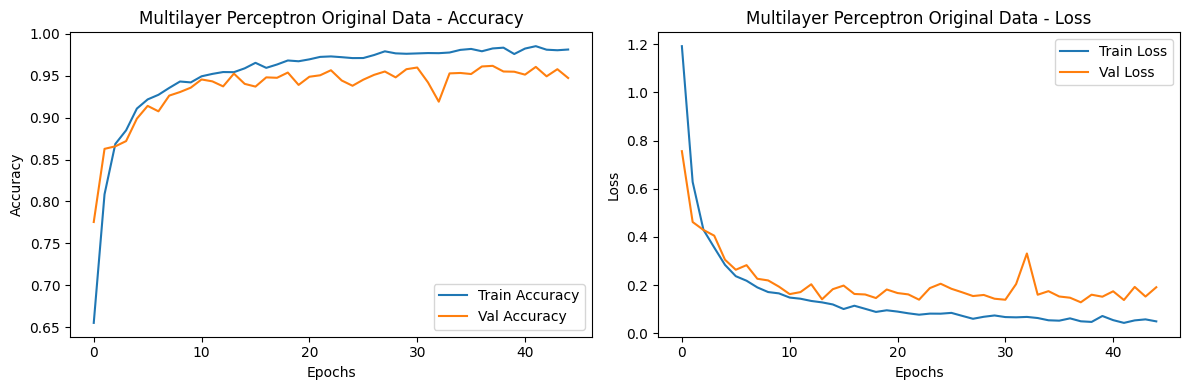

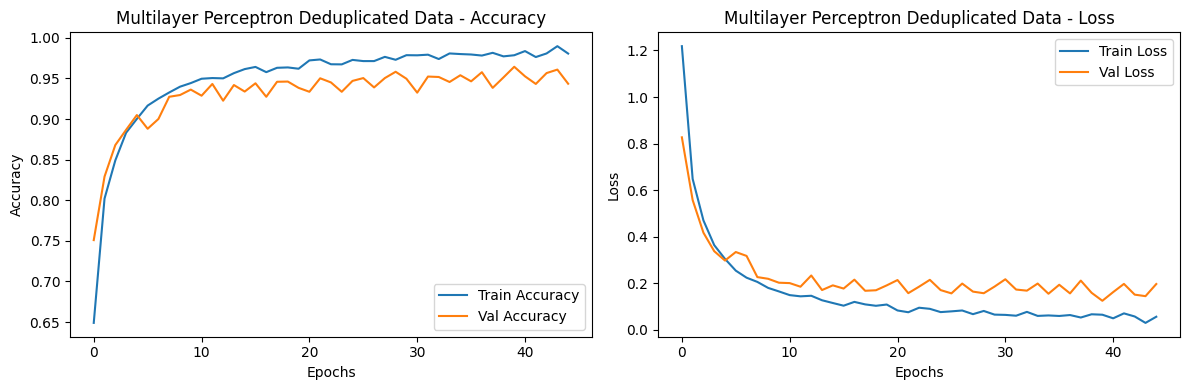

In [15]:
# Plotting

def plot(history, model_name, title): # Accuracy and Loss Comparison
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} {title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} {title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Multilayer Perceptron
plot(mlp_history, model_name="Multilayer Perceptron", title='Normal Data')
plot(mlp_history_dd, model_name="Multilayer Perceptron", title='Deduplicated Data')

In [16]:
def plot_rf_cv_metrics(acc, f1, precision, recall, model_name="Random Forest", title="Original Data"):
    folds = range(1, 6)

    plt.figure(figsize=(12, 4))

    # Accuracy and F1 Score
    plt.subplot(1, 2, 1)
    plt.plot(folds, acc, label='Accuracy', marker='o')
    plt.plot(folds, f1, label='F1 Score', marker='s')
    plt.title(f'{model_name} {title} - Accuracy & F1')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.ylim(0.85, 1.00)
    plt.xticks(folds)
    plt.legend()

    # Precision and Recall
    plt.subplot(1, 2, 2)
    plt.plot(folds, precision, label='Precision', marker='^')
    plt.plot(folds, recall, label='Recall', marker='v')
    plt.title(f'{model_name} {title} - Precision & Recall')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.ylim(0.85, 1.00)
    plt.xticks(folds)
    plt.legend()

    plt.tight_layout()
    plt.show()


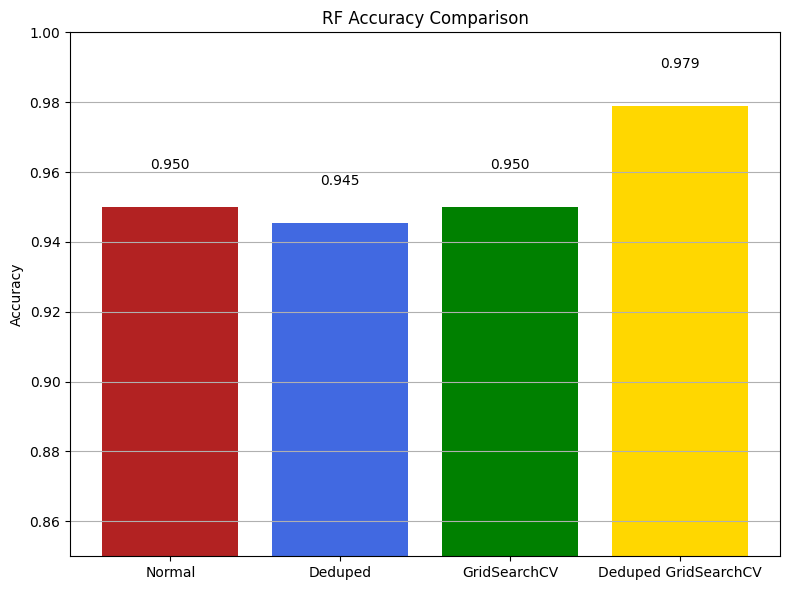

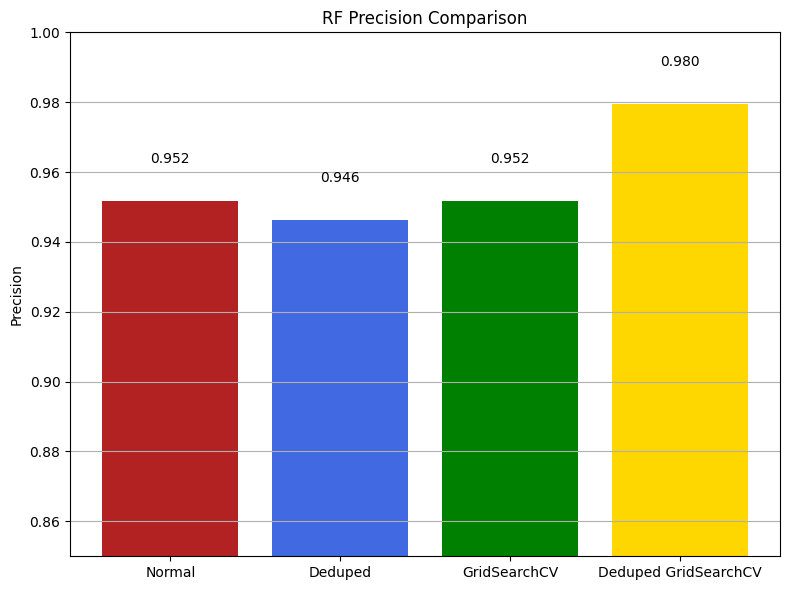

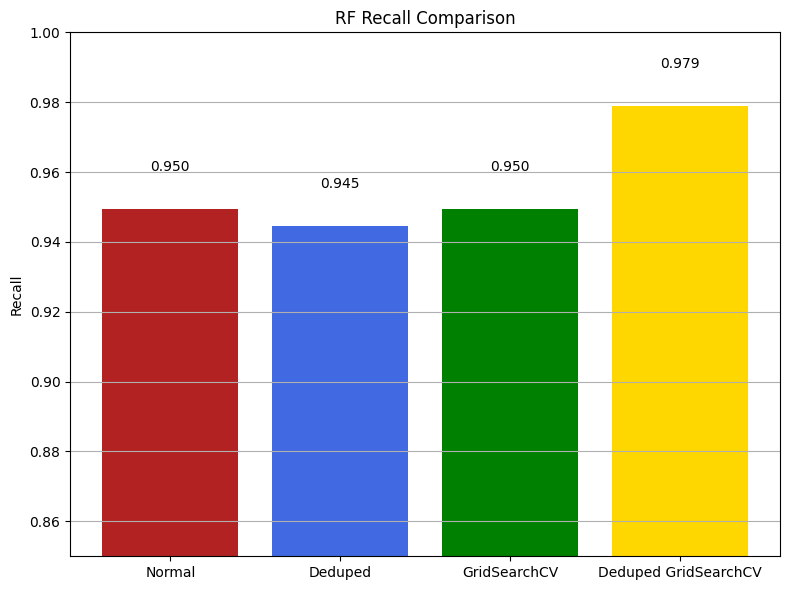

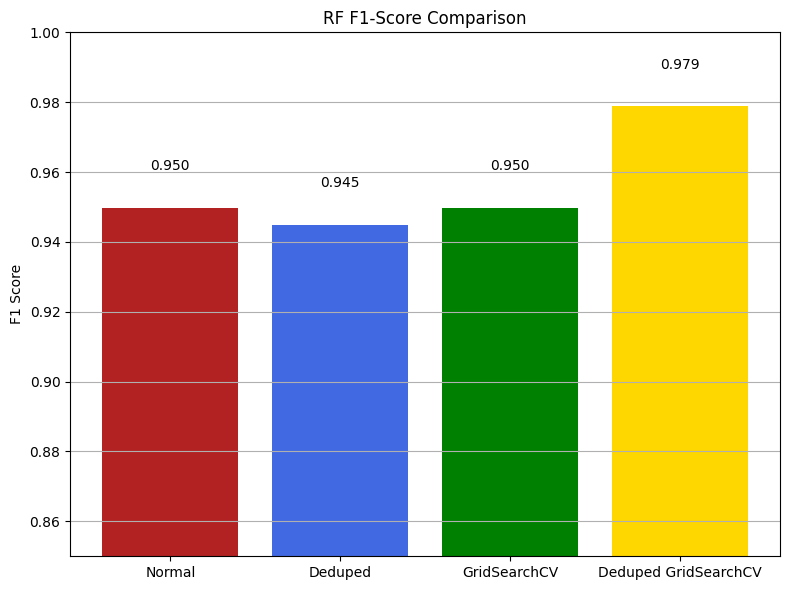

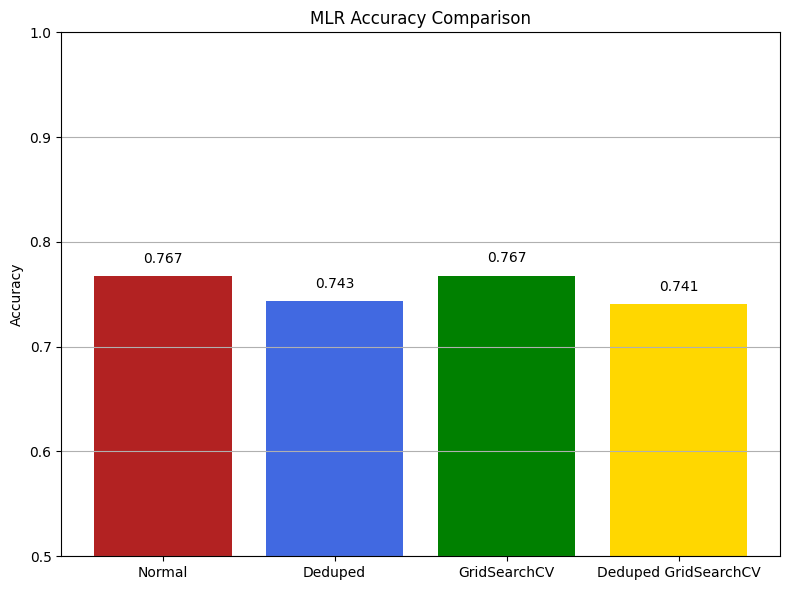

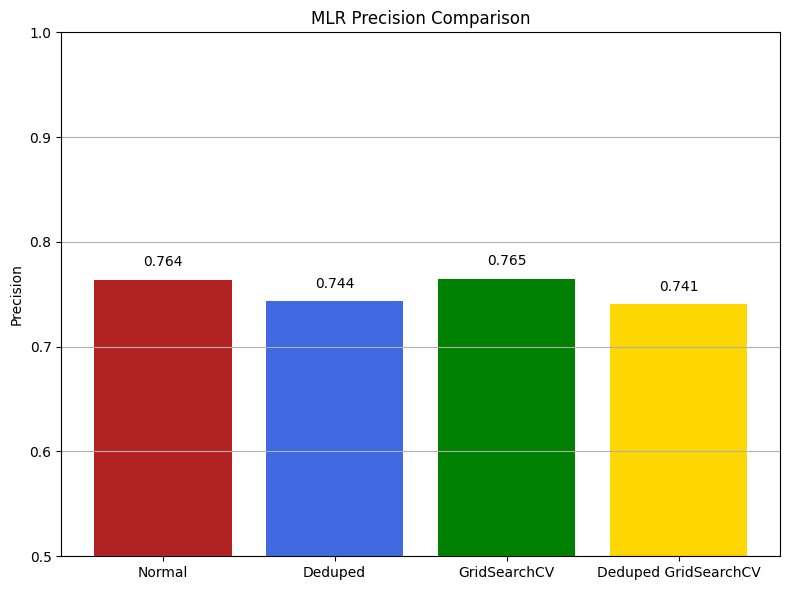

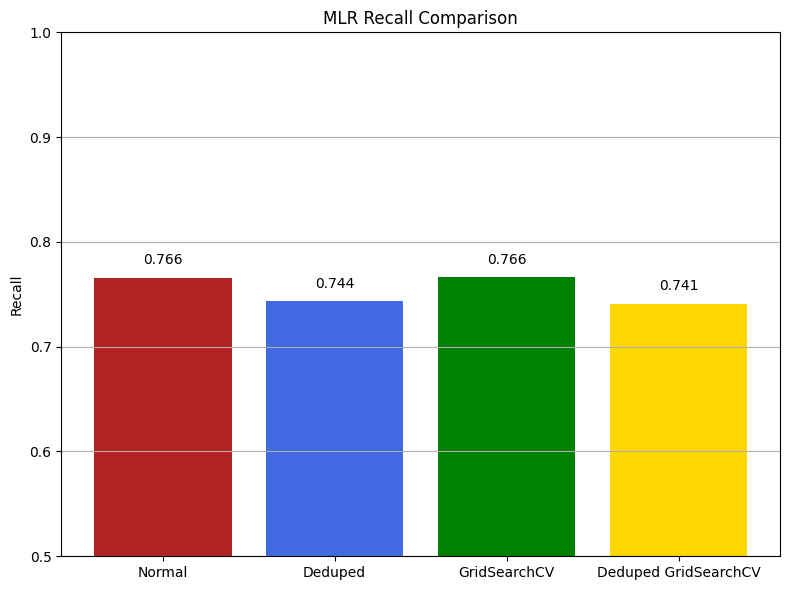

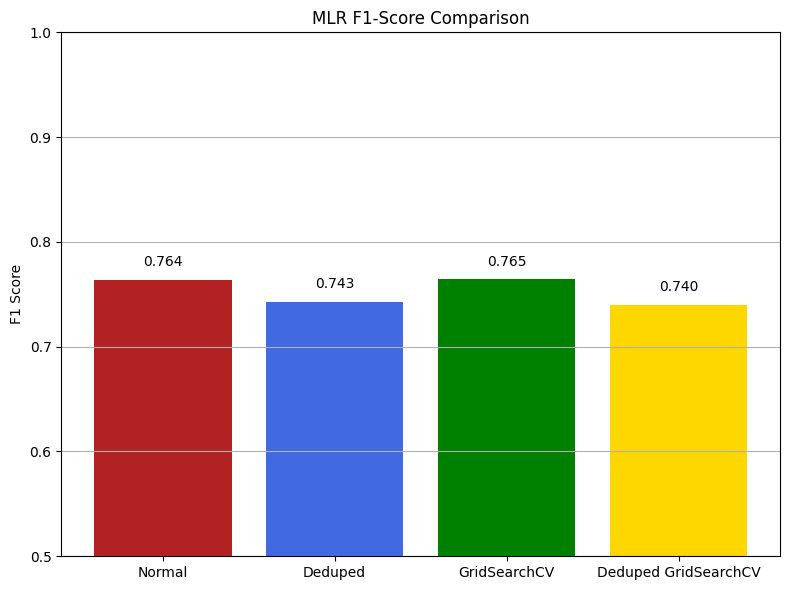

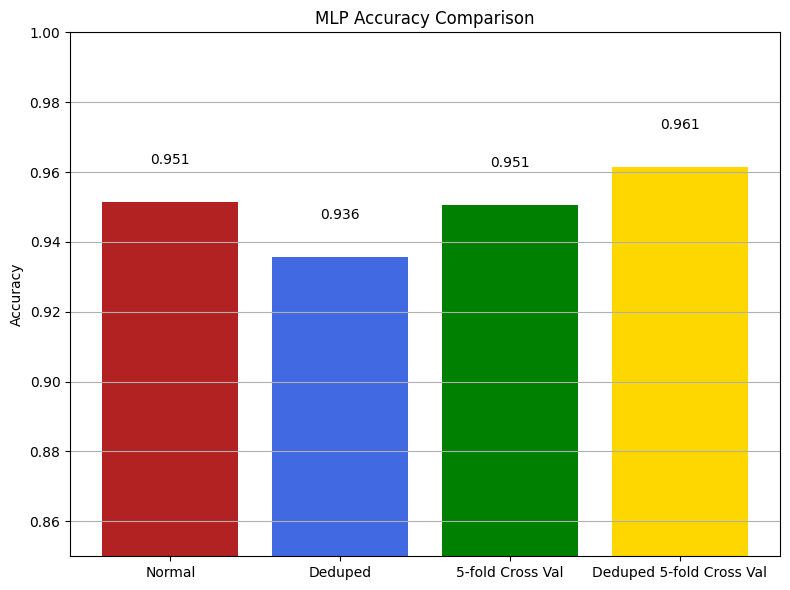

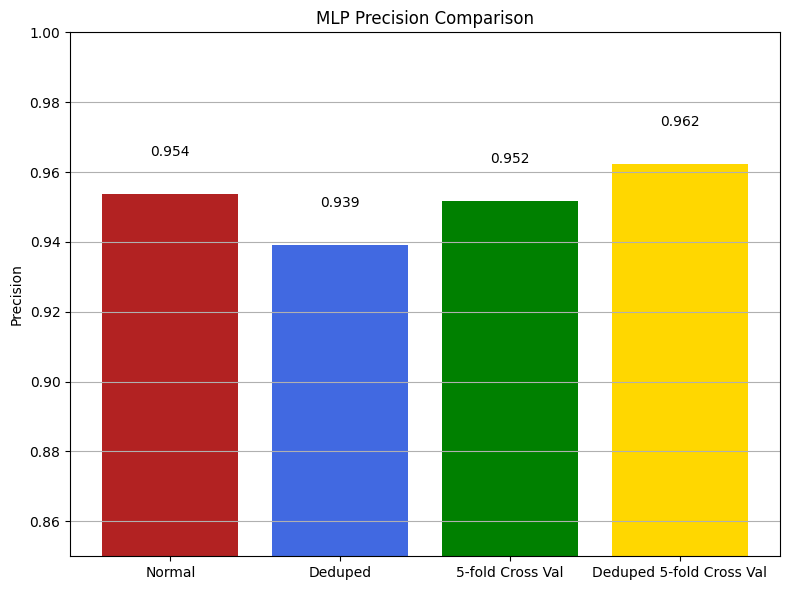

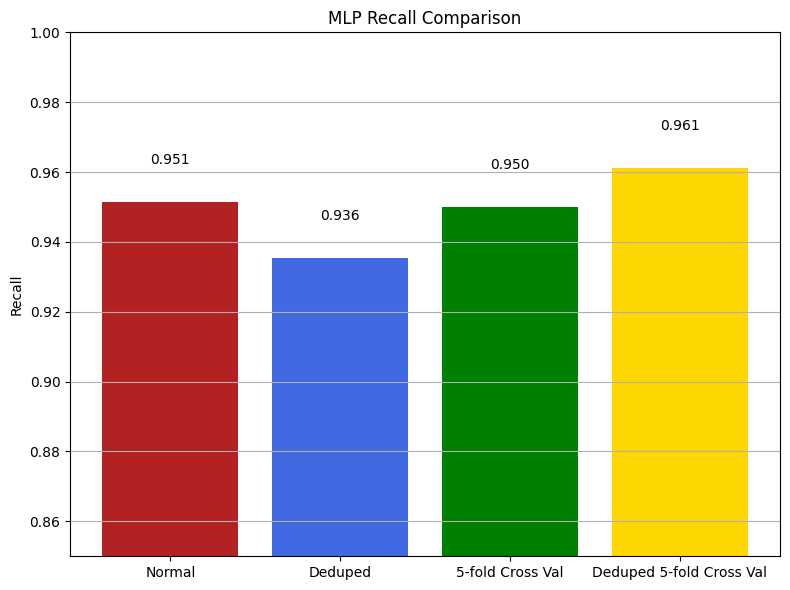

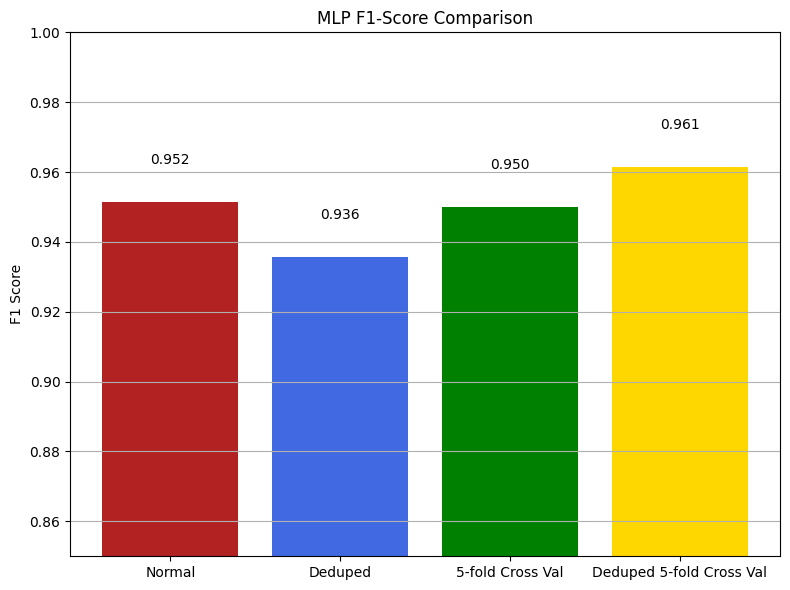

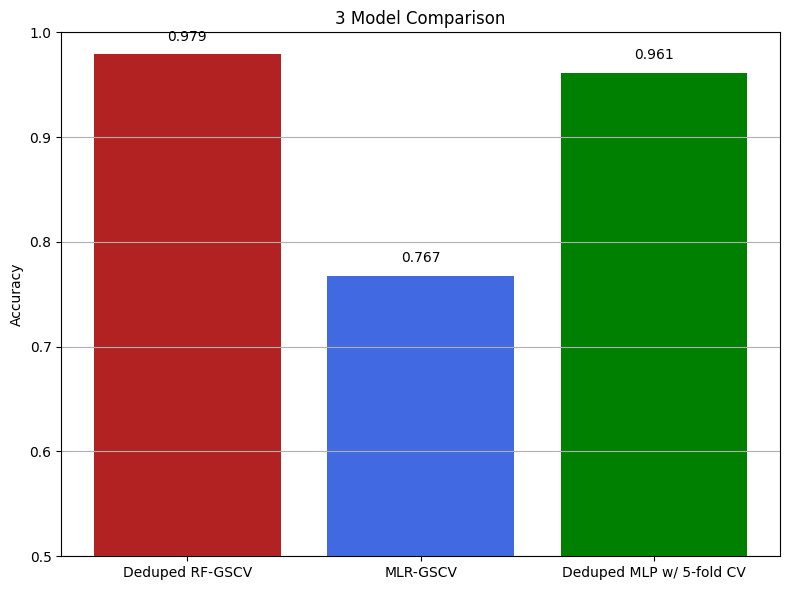

In [20]:
def plot_bar(metric_values, model_labels, title, ylabel, ylim_min): # Bar Chart Stat Comparison (acc,f1, precision, recall)
    plt.figure(figsize=(8, 6))
    bars = plt.bar(model_labels, metric_values, color=['firebrick', 'royalblue', 'green', 'gold', 'pink', 'purple'])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.ylim(ylim_min, 1)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Random Forest
rf_labels = ['Normal', 'Deduped', 'GridSearchCV', 'Deduped GridSearchCV']
plot_bar([rf_test_acc, rf_test_acc_dd, test_accuracy_rf_GSCV, test_accuracy_rf_dd_GSCV], rf_labels, title='RF Accuracy Comparison', ylabel='Accuracy', ylim_min=0.85)
plot_bar([rf_test_precision, rf_test_precision_dd, test_precision_rf_GSCV, test_precision_rf_dd_GSCV], rf_labels, title='RF Precision Comparison', ylabel='Precision', ylim_min=0.85)
plot_bar([rf_test_recall, rf_test_recall_dd, test_recall_rf_GSCV, test_recall_rf_dd_GSCV], rf_labels, title='RF Recall Comparison', ylabel='Recall', ylim_min=0.85)
plot_bar([rf_test_f1, rf_test_f1_dd, test_f1_rf_GSCV, test_f1_rf_dd_GSCV], rf_labels, title='RF F1-Score Comparison', ylabel='F1 Score', ylim_min=0.85)

# Multinomial Logistic Regression
mlr_labels = ['Normal', 'Deduped', 'GridSearchCV', 'Deduped GridSearchCV']
plot_bar([mlr_test_acc, mlr_test_acc_dd, mlr_test_acc_GSCV, mlr_test_acc_dd_GSCV], mlr_labels, title='MLR Accuracy Comparison', ylabel='Accuracy', ylim_min=0.5)
plot_bar([mlr_precision, mlr_precision_dd, mlr_test_precision_GSCV, mlr_test_precision_dd_GSCV], mlr_labels, title='MLR Precision Comparison', ylabel='Precision', ylim_min=0.5)
plot_bar([mlr_recall, mlr_recall_dd, mlr_test_recall_GSCV, mlr_test_recall_dd_GSCV], mlr_labels, title='MLR Recall Comparison', ylabel='Recall', ylim_min=0.5)
plot_bar([mlr_f1, mlr_f1_dd, mlr_test_f1_GSCV, mlr_test_f1_dd_GSCV], mlr_labels, title='MLR F1-Score Comparison', ylabel='F1 Score', ylim_min=0.5)

# Multilayer Perceptron
mlp_labels = ['Normal', 'Deduped', '5-fold Cross Val', 'Deduped 5-fold Cross Val']
plot_bar([mlp_test_acc, mlp_test_acc_dd, mlp_test_acc_cv, mlp_test_acc_dd_cv], mlp_labels, title='MLP Accuracy Comparison', ylabel='Accuracy', ylim_min=0.85)
plot_bar([mlp_precision, mlp_precision_dd, mlp_test_precision_cv, mlp_test_precision_dd_cv], mlp_labels, title='MLP Precision Comparison', ylabel='Precision', ylim_min=0.85)
plot_bar([mlp_recall, mlp_recall_dd, mlp_test_recall_cv, mlp_test_recall_dd_cv], mlp_labels, title='MLP Recall Comparison', ylabel='Recall', ylim_min=0.85)
plot_bar([mlp_f1, mlp_f1_dd, mlp_test_f1_cv, mlp_test_f1_dd_cv], mlp_labels, title='MLP F1-Score Comparison', ylabel='F1 Score', ylim_min=0.85)

# Final Comparison
plot_bar([test_accuracy_rf_dd_GSCV, mlr_test_acc_GSCV, mlp_test_acc_dd_cv], ['Deduped RF-GSCV', 'MLR-GSCV', 'Deduped MLP w/ 5-fold CV'], title='3 Model Comparison', ylabel='Accuracy', ylim_min=0.5)
